In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded1 = drive.CreateFile({'id':'1q9LaZ03f8yixb1AAg_R_X95YfyOcRkIS'}) # replace the id with id of file you want to access
downloaded1.GetContentFile('census-income.data')

In [0]:
downloaded2 = drive.CreateFile({'id':'1v6gK5zukJFNrviYlA_9aCVMLs9eTJV08'}) # replace the id with id of file you want to access
downloaded2.GetContentFile('census-income.test')

In [0]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, log_loss, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import matplotlib.pyplot as plt

In [0]:
"""importing the dataset"""
data1 = pd.read_csv('census-income.data', header = None, names = ["age", "workclass", "industry_code", "occupation_code", "education","wage_per_hour","enrolled_in_edu_inst_last_wk", "marital_status", "major_industry_code", "major_occupation_code", "race", "hispanic_origin", "sex", "member_of_a_labour_union", "reason_for_unemployment", "employment_status", "capital_gains", "capital_losses", "dividend_from_stocks", "tax_filler_status", "region_of_previous_residence", "state_of_previous_residence", "detailed_household_and_family_stat", "detailed_household_summary_in_household", "instance_weight", "migration_code_change_in_msa", "migration_code_change_in_reg", "migration_code_move_within_reg", "live_in_this_house_1_year_ag", "migration_prev_res_in_sunbelt", "num_persons_worked_for_employer", "family_members_under_18", "country_of_birth_father", "country_of_birth_mother", "country_of_birth_self", "citizenship", "own_business_or_self_employed", "fill_inc_questionnaire_for_veteran's_admin", "veterans_benefits", "weeks_worked_in_year", "year", "class"])
data2 = pd.read_csv('census-income.test', header = None, names = ["age", "workclass", "industry_code", "occupation_code", "education","wage_per_hour","enrolled_in_edu_inst_last_wk", "marital_status", "major_industry_code", "major_occupation_code", "race", "hispanic_origin", "sex", "member_of_a_labour_union", "reason_for_unemployment", "employment_status", "capital_gains", "capital_losses", "dividend_from_stocks", "tax_filler_status", "region_of_previous_residence", "state_of_previous_residence", "detailed_household_and_family_stat", "detailed_household_summary_in_household", "instance_weight", "migration_code_change_in_msa", "migration_code_change_in_reg", "migration_code_move_within_reg", "live_in_this_house_1_year_ag", "migration_prev_res_in_sunbelt", "num_persons_worked_for_employer", "family_members_under_18", "country_of_birth_father", "country_of_birth_mother", "country_of_birth_self", "citizenship", "own_business_or_self_employed", "fill_inc_questionnaire_for_veteran's_admin", "veterans_benefits", "weeks_worked_in_year", "year", "class"])


In [0]:
""" Preprocessing """
ogdata = pd.concat([data1, data2], ignore_index = True)
data = pd.concat([data1, data2], ignore_index = True)
data = data.drop_duplicates(subset=None, keep='first', inplace=False)


In [0]:
"""dictionary for replacement"""
dictionary1 = {'\(.*':'a'}
dictionary2 = {'\?':'Not in universe'}
dictionary3 = {'\-':'o'}
data.replace(dictionary1, regex=True, inplace=True)
data.replace(dictionary2, regex=True, inplace=True)
data.replace(dictionary3, regex = True, inplace = True)
data.replace({
        'Not in universe' : np.nan,
        },inplace = True , regex = True)


In [0]:
"""data description : dropped columns"""
data["enrolled_in_edu_inst_last_wk"].value_counts() 
data["major_occupation_code"].value_counts() 
data["hispanic_origin"].value_counts() 
data["reason_for_unemployment"].value_counts() 
data["region_of_previous_residence"].value_counts() 
data["state_of_previous_residence"].value_counts() 
data["detailed_household_and_family_stat"].value_counts() 
data["migration_code_move_within_reg"].value_counts() 
data["live_in_this_house_1_year_ag"].value_counts() 
data["migration_prev_res_in_sunbelt"].value_counts() 
data["family_members_under_18"].value_counts() 
data["fill_inc_questionnaire_for_veteran's_admin"].value_counts()

In [0]:
"""dropping columns"""
data.drop("enrolled_in_edu_inst_last_wk", axis = 1, inplace = True)
data.drop("major_occupation_code", axis = 1, inplace = True)
data.drop("hispanic_origin", axis = 1, inplace = True)
data.drop("reason_for_unemployment", axis = 1, inplace = True)
data.drop("region_of_previous_residence", axis = 1, inplace = True)
data.drop("state_of_previous_residence", axis = 1, inplace = True)
data.drop("detailed_household_and_family_stat", axis = 1, inplace = True)
data.drop("migration_code_move_within_reg", axis = 1, inplace = True)
data.drop("live_in_this_house_1_year_ag", axis = 1, inplace = True)
data.drop("migration_prev_res_in_sunbelt", axis = 1, inplace = True)
data.drop("family_members_under_18", axis = 1, inplace = True)
data.drop("fill_inc_questionnaire_for_veteran's_admin", axis = 1, inplace = True)


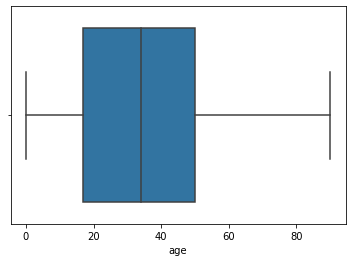

In [0]:
"""removing outliers"""
#age
data['age'].value_counts()
sns.boxplot(x = data["age"])
data = data[(data.age >= 10)]

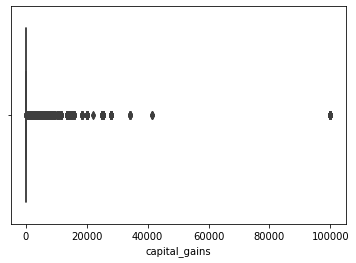

In [0]:
#ccapital_gains
data['capital_gains'].value_counts()
sns.boxplot(x = data["capital_gains"])
data = data[(data.capital_gains <= 30000)]

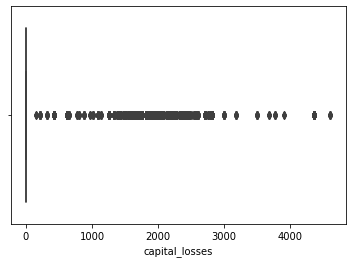

In [0]:
#capital_losses
data['capital_losses'].value_counts()
sns.boxplot(x = data["capital_losses"])
data = data[(data.capital_losses <= 3000)]

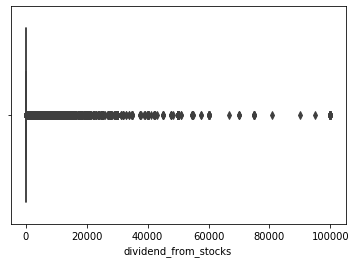

In [0]:
#dividend_from_stocks
data['dividend_from_stocks'].value_counts()
sns.boxplot(x = data["dividend_from_stocks"])
data = data[(data.dividend_from_stocks <= 60000)]

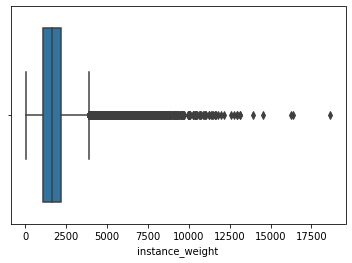

In [0]:
#instance_weight
data['instance_weight'].value_counts()
sns.boxplot(x = data["instance_weight"])
data = data[(data.instance_weight <= 13000)]

In [0]:
""" Dealing with NAs """
data.isnull().sum()
def fillna(col):
    col.fillna(col.value_counts().index[0], inplace=True)
    return col

WorkClass  = data['workclass']
Major_Industry_Code = data['major_industry_code']
Member_Of_Labour_Union = data['member_of_a_labour_union']
Migration_Code_Change_MSA = data['migration_code_change_in_msa']
Migration_Code_Change_REG = data['migration_code_change_in_reg']
Fathers_birth_place = data['country_of_birth_father']
Mothers_birth_place = data['country_of_birth_mother']
Childs_birth_place = data['country_of_birth_self']


In [0]:
""" Imputing the NAs """
fillna(WorkClass)
fillna(Major_Industry_Code)
fillna(Member_Of_Labour_Union)
fillna(Migration_Code_Change_MSA)
fillna(Migration_Code_Change_REG)
fillna(Fathers_birth_place)
fillna(Childs_birth_place)
fillna(Mothers_birth_place)

data['workclass'] = pd.DataFrame(WorkClass)
data['major_industry_code'] = pd.DataFrame(Major_Industry_Code)
data['member_of_a_labour_union'] = pd.DataFrame(Member_Of_Labour_Union)
data['migration_code_change_in_reg'] = pd.DataFrame(Migration_Code_Change_REG)
data['country_of_birth_father'] = pd.DataFrame(Fathers_birth_place)
data['country_of_birth_mother'] = pd.DataFrame(Mothers_birth_place)
data['country_of_birth_self'] =  pd.DataFrame(Childs_birth_place)

In [0]:
"""creating bins"""
#workclass
ogdata["workclass"].value_counts()
data.replace({
        'Private' : 'private', 
        'Selfoemployedonot incorporated' : 'self-employed',
        'Local government' : 'government',
        'State government' : 'government',
        'Selfoemployedoincorporated' : 'government',
        'Federal government' : 'government',
        'Never worked' : 'unpaid',
        'Without pay' : 'unpaid'},inplace = True, regex = True)
data["workclass"].value_counts() 

 private          207869
 government        27082
 self-employed     12633
 unpaid              882
Name: workclass, dtype: int64

In [0]:
ogdata["education"].value_counts() 
data.replace({
        'High school graduate' : 'high-school-graduate',
        'Some college but no degree' : 'high-school-graduate',
        "Bachelors degreea" : 'undergraduate',
        'Children' : 'children',
        '7th and 8th grade' : 'children',
        '10th grade' : 'high-school',
        '11th grade' : 'high-school',
        'Masters degreea' : 'postgraduate',
        '9th grade' : 'high-school',
        'Associates degreeooccup /vocational' : 'undergraduate',
        'Associates degreeoacademic program' : 'undergraduate',
        '5th or 6th grade' : 'children',
        '12th grade no diploma' : 'high-school',
        '1st 2nd 3rd or 4th grade' : 'children',
        'Prof school degree a' : 'postgraduate',
        'Doctorate degreea' : 'postgraduate',
        'Less than 1st grade' : 'children'},inplace = True , regex = True)    
data["education"].value_counts()

 high-school-graduate    114053
 undergraduate            44001
 children                 42100
 high-school              34201
 postgraduate             14111
Name: education, dtype: int64

In [0]:
ogdata["marital_status"].value_counts() 
data.replace({
        'Never married':'Married',
        'Marriedocivilian spouse present': 'Single',
        'Divorced':'Seperated',
        'Widowed':'Widowed',
        'Separated':'Seperated',
        'Marriedospouse absent':'Seperated',
        'MarriedoA F spouse present':'Married'
        }, inplace = True, regex = True)   
data["marital_status"].value_counts() 

 Single       125708
 Married       80574
 Seperated     26469
 Widowed       15715
Name: marital_status, dtype: int64

In [0]:
ogdata["major_industry_code"].value_counts() 
data.replace({        
        'Retail trade' : 'trade',
        'Manufacturingodurable goods' : 'trade',
        'Education' : 'services',
        'Manufacturingonondurable goods' : 'trade',
        'Finance insurance and real estate' : 'services',
        'Construction' : 'trade',
        'Business and repair services': 'services',
        'Medical except hospital': 'services',
        'Public administration': 'services',
        'Other professional services': 'services',
        'Transportation': 'trade',
        'Hospital services': 'services',
        'Wholesale trade': 'trade',
        'Agriculture': 'primary',
        'Personal services except private HH': 'services',
        'Social services': 'services',
        'Entertainment': 'services',
        'Communications': 'services',
        'Utilities and sanitary services': 'services',
        'private household services': 'services',
        'Mining': 'primary',
        'Forestry and fisheries': 'primary',
        'Armed Forces': 'services'
        },inplace = True , regex = True)
data["major_industry_code"].value_counts()  

 trade       170990
 services     71842
 primary       5634
Name: major_industry_code, dtype: int64

In [0]:
ogdata["race"].value_counts() 
data.replace({
        'Amer Indian Aleut or Eskimo' : 'Other'
        },inplace = True , regex = True)
data["race"].value_counts() 


 White                        210242
 Black                         24165
 Asian or Pacific Islander      7241
 Other                          6818
Name: race, dtype: int64

In [0]:
#employment_status
ogdata["employment_status"].value_counts()  
data.replace({
        'children or services' : 'other',
        'Fullotime schedules' : 'full-time',
        'Not in labor force' : 'unemployed',
        'PT for nonoecon reasons usually FT' : 'part-time',
        'Unemployed fullotime' : 'unemployed',
        'PT for econ reasons usually PT' : 'part-time',
        'Unemployed parto time' : 'part-time',
        'PT for econ reasons usually FT' : 'part-time',        
        },inplace = True , regex = True)
data["employment_status"].value_counts()


 other         135208
 full-time      60907
 unemployed     43498
 part-time       8853
Name: employment_status, dtype: int64

In [0]:
#migration_code_change_in_msa
ogdata["migration_code_change_in_msa"].value_counts() 
data.replace({        
        'Nonmover':'nonmover',
        'MSA to MSA':'metropolitan-area',
        'NonMSA to nonMSA':'outside-metropolitan-area',
        'MSA to nonMSA':'outside-metropolitan-area',
        'NonMSA to MSA':'metropolitan-area',
        'Abroad to MSA':'metropolitan-area',
        'Not identifiable':'nonmover',
        'Abroad to nonMSA':'outside-metropolitan-area'
        },inplace = True , regex = True)
data["migration_code_change_in_msa"].value_counts() 


 nonmover                     229546
 metropolitan-area             13683
 outside-metropolitan-area      4464
 Nonmetropolitan-area            773
Name: migration_code_change_in_msa, dtype: int64

In [0]:
#migration_code_change_in_reg
ogdata["migration_code_change_in_reg"].value_counts() 
data.replace({
        'nonmover':'nonmover',
        'Same county':'nonmover',
        'Different county same state':'mover',
        'Different region':'mover',
        'Different state same division':'mover',
        'Abroad':'mover',
        'Different division same region':'mover'
        },inplace = True , regex = True)
data["migration_code_change_in_reg"].value_counts() 

 nonmover    241075
 mover         7391
Name: migration_code_change_in_reg, dtype: int64

In [0]:
#country_of_birth_father
ogdata["country_of_birth_father"].value_counts()
data.replace({
        'UnitedoStates':'north-america',
        'Mexico':'north-america',
        'PuertooRico':'north-america',
        'Italy':'europe',
        'Canada':'north-america',
        'Germany':'europe',
        'Poland':'europe',
        'Philippines':'asia',
        'DominicanoRepublic':'north-america',
        'Cuba':'north-america',
        'EloSalvador':'north-america',
        'China':'asia',
        'England':'europe',
        'Ireland':'europe',
        'India':'asia',
        'Columbia':'south-america',
        'South Korea':'asia',
        'Jamaica':'north-america',
        'Guatemala':'north-america',
        'Japan':'asia',
        'Portugal':'europe',
        'Vietnam':'asia',
        'Greece':'europe',
        'Ecuador':'south-america',
        'Hungary':'europe',
        'Nicaragua':'north-america',
        'Haiti':'north-america',
        'Peru':'south-america',
        'Scotland':'europe',
        'Yugoslavia':'europe',
        'Iran':'asia',
        'Cambodia':'asia',
        'France':'europe',
        'Honduras':'north-america',
        'Taiwan':'asia',        
        'Laos':'asia',
        'Trinadad&Tobago':'south-america',
        'Thailand':'asia',
        'Hong Kong':'asia',
        'HolandoNetherlands':'europe',
        'Panama':'north-america',
        'OutlyingoU S a' : 'north-america'
        },inplace = True , regex = True)


In [0]:

#citizenship
ogdata["citizenship"].value_counts()
data.replace({
        'Nativeo Born in the United States':'american',
        'Foreign borno Not a citizen of U S':'not-american',
        'Foreign borno U S citizen by naturalization':'american',
        'Nativeo Born abroad of American Parenta':'american',
        'Nativeo Born in Puerto Rico or U S Outlying':'american'        
        },inplace = True , regex = True)
data["citizenship"].value_counts()

 american         229525
 not-american      18941
Name: citizenship, dtype: int64

In [0]:
data["country_of_birth_father"].value_counts()

 north-america    229185
 europe            11224
 asia               6285
 south-america      1772
Name: country_of_birth_father, dtype: int64

In [0]:
data["tax_filler_status"].value_counts()

 Joint both under 65             100437
 Nonfiler                         62470
 Single                           56128
 Joint both 65+                   12482
 Head of household                11143
 Joint one under 65 & one 65+      5806
Name: tax_filler_status, dtype: int64

In [0]:
data["sex"].value_counts()

 Female    130824
 Male      117642
Name: sex, dtype: int64

In [0]:
data["veterans_benefits"].value_counts() 

2    224348
0     21112
1      3006
Name: veterans_benefits, dtype: int64

In [0]:
"""  MACHINE LEARNING AND DEEP LEARNING WITH PYTHON- """
#Encoding
label_encoder = LabelEncoder()
data['WorkClass'] = label_encoder.fit_transform(data['workclass'])
data['Education'] = label_encoder.fit_transform(data['education'])
data['Marital_Status'] = label_encoder.fit_transform(data['marital_status'])
data['Major_Industry_Code']= label_encoder.fit_transform(data['major_industry_code'])
data['Member_of_labour_union'] = label_encoder.fit_transform(data['member_of_a_labour_union'])
data['Employment_Status'] = label_encoder.fit_transform(data['employment_status'])
data['Tax_Filer_Status'] = label_encoder.fit_transform(data['tax_filler_status'])
data['Detailed_Household_Summary'] = label_encoder.fit_transform(data['detailed_household_summary_in_household'])
data['Migration_Code_Change_MSA'] = label_encoder.fit_transform(data['migration_code_change_in_msa'])
data['Migration_Code_Change_REG'] = label_encoder.fit_transform(data['migration_code_change_in_reg'])
data['Fathers_birthplace'] = label_encoder.fit_transform(data['country_of_birth_father'])
data['Mothers_birthplace'] = label_encoder.fit_transform(data['country_of_birth_mother'])
data['Childs_birthplace'] = label_encoder.fit_transform(data['country_of_birth_self'])
data['Citizenship'] = label_encoder.fit_transform(data['citizenship'])
data['Class'] = label_encoder.fit_transform(data['class'])
data['Sex']= label_encoder.fit_transform(data['sex'])
data['Race']= label_encoder.fit_transform(data['race'])
data.drop(['class','workclass','education','marital_status','major_industry_code','member_of_a_labour_union','employment_status','tax_filler_status','detailed_household_summary_in_household','migration_code_change_in_msa','migration_code_change_in_reg','country_of_birth_father','country_of_birth_mother','country_of_birth_self','citizenship','sex','race'], axis = 1, inplace = True)


In [0]:
X = data.drop("Class", axis = 1)
Y = data['Class']

In [0]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 15)
rfe = sel.fit(X,Y)

In [0]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True  True  True  True False False  True
 False  True  True False False False  True  True  True False False False
 False False False  True False]
[ 1  1  1  4  1  1  1  1  1  2 14  1  6  1  1  3  7 13  1  1  1 10 15  8
  9 11 12  1  5]


In [0]:
ranks = pd.DataFrame(rfe.ranking_)
cols = pd.DataFrame(X.columns)
rfe_scores = pd.concat([cols, ranks], axis = 1)
rfe_scores.columns = ["feature", "score"]
rfe_scores

,feature,score
0,age,1
1,industry_code,1
2,occupation_code,1
3,wage_per_hour,4
4,capital_gains,1
5,capital_losses,1
6,dividend_from_stocks,1
7,instance_weight,1
8,num_persons_worked_for_employer,1
9,own_business_or_self_employed,2


In [0]:

X_rfe = X[['age','industry_code','occupation_code','capital_gains','capital_losses','dividend_from_stocks','instance_weight','num_persons_worked_for_employer','weeks_worked_in_year','WorkClass','Education','Employment_Status','Tax_Filer_Status','Detailed_Household_Summary','Sex']]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, Y, test_size = 0.2, random_state = 0)

In [0]:
# Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [0]:
""" LOGISTIC REGRESSION """
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])
#After fitting the model on these features, we get following results

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
accuracy,0.939127
recall,0.990329
precision,0.946547
roc_auc_score,0.634868


In [0]:
y_predlog = logit.predict_proba(X_test)
log_loss(y_test, y_predlog, eps=1e-15, normalize=True, sample_weight=None, labels=None)  

0.1602818801116339

In [0]:
""" RANDOMFOREST CLASSIFIER  """
RFC = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 12)
RFC.fit(X_train, y_train)
y_pred2 = RFC.predict(X_test)
pd.DataFrame(data=[accuracy_score(y_test, y_pred2), recall_score(y_test, y_pred2),
                   precision_score(y_test, y_pred2), roc_auc_score(y_test, y_pred2)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.946915
recall,0.987705
precision,0.956509
roc_auc_score,0.704526


In [0]:
y_predlog = RFC.predict_proba(X_test)
log_loss(y_test, y_predlog, eps=1e-15, normalize=True, sample_weight=None, labels=None)  

0.17354214515649963

In [0]:
""" ANN   """
from tensorflow.keras.models import Sequential
import keras
from tensorflow.python.keras.models import Sequential
#from tensorflow.keras.models import models
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
""" Initialising the ANN """ 
classifier = Sequential()

In [0]:
#training the first neural network
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 15))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=6, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=6, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'hard_sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="hard_sigmoid", units=1, kernel_initializer="glorot_uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 133177 samples, validate on 65595 samples
Epoch 1/10
133177/133177 [==============================] - 29s 216us/step - loss: 0.1839 - acc: 0.9266 - val_loss: 0.1700 - val_acc: 0.9292
Epoch 2/10
133177/133177 [==============================] - 28s 213us/step - loss: 0.1713 - acc: 0.9266 - val_loss: 0.1675 - val_acc: 0.9292
Epoch 3/10
133177/133177 [==============================] - 28s 212us/step - loss: 0.1690 - acc: 0.9266 - val_loss: 0.1643 - val_acc: 0.9292
Epoch 4/10
133177/133177 [==============================] - 28s 213us/step - loss: 0.1669 - acc: 0.9266 - val_loss: 0.1690 - val_acc: 0.9292
Epoch 5/10
133177/133177 [==============================] - 28s 212us/step - loss: 0.1650 - acc: 0.9266 - val_loss: 0.1621 - val_acc: 0.9292
Epoch 6/10
133177/133177 [==============================] - 28s 211us/step - loss: 0.1642 - acc: 0.9266 - val_loss: 0.1605 - val_acc: 0.9292
Epoch 7/10
133177/133177 [==============================] - 28s 210us/step - loss: 0.1625 - acc: 0.9266

In [0]:
# Predicting the Test set results
y_pred_s = classifier.predict(X_test)
y_pred_s = (y_pred_s > 0.5)

In [0]:
pd.DataFrame(data=[accuracy_score(y_test, y_pred_s), recall_score(y_test, y_pred_s),
                   precision_score(y_test, y_pred_s), roc_auc_score(y_test, y_pred_s)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.927979
recall,1.000000
precision,0.927979
roc_auc_score,0.500000


In [0]:
#training the second neural network
classifier.add(Dense(output_dim = 12, init = 'glorot_uniform',activation='relu',input_dim = 15))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=12, kernel_initializer="glorot_uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(Dense(output_dim = 10, init = 'he_uniform',activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'hard_sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="hard_sigmoid", units=1, kernel_initializer="glorot_uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 133177 samples, validate on 65595 samples
Epoch 1/10
133177/133177 [==============================] - 25s 186us/step - loss: 0.2069 - acc: 0.9092 - val_loss: 0.1594 - val_acc: 0.9378
Epoch 2/10
133177/133177 [==============================] - 25s 185us/step - loss: 0.1600 - acc: 0.9388 - val_loss: 0.1578 - val_acc: 0.9407
Epoch 3/10
133177/133177 [==============================] - 24s 183us/step - loss: 0.1587 - acc: 0.9399 - val_loss: 0.1571 - val_acc: 0.9409
Epoch 4/10
133177/133177 [==============================] - 26s 192us/step - loss: 0.1581 - acc: 0.9401 - val_loss: 0.1564 - val_acc: 0.9403
Epoch 5/10
133177/133177 [==============================] - 25s 187us/step - loss: 0.1577 - acc: 0.9405 - val_loss: 0.1567 - val_acc: 0.9399
Epoch 6/10
133177/133177 [==============================] - 24s 184us/step - loss: 0.1567 - acc: 0.9406 - val_loss: 0.1555 - val_acc: 0.9405
Epoch 7/10
133177/133177 [==============================] - 25s 185us/step - loss: 0.1563 - acc: 0.9406

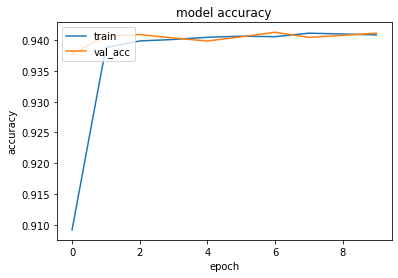

In [0]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

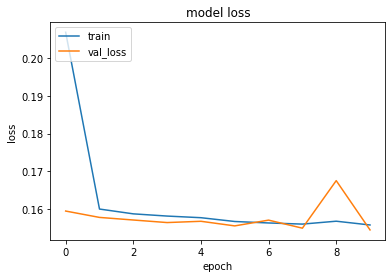

In [0]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

In [0]:
y_pred_r = classifier.predict(X_test)
y_pred_r = (y_pred_r > 0.5)

In [0]:
pd.DataFrame(data=[accuracy_score(y_test, y_pred_r), recall_score(y_test, y_pred_r),
                   precision_score(y_test, y_pred_r), roc_auc_score(y_test, y_pred_r)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.940757
recall,0.986143
precision,0.951759
roc_auc_score,0.671054


In [0]:
#creating third neural network
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 15))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=15, units=6, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  """Entry point for launching an IPython kernel.


In [0]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 133177 samples, validate on 65595 samples
Epoch 1/10





133177/133177 [==============================] - 21s 161us/step - loss: 0.1974 - acc: 0.9281 - val_loss: 0.1657 - val_acc: 0.9366
Epoch 2/10
133177/133177 [==============================] - 21s 155us/step - loss: 0.1629 - acc: 0.9375 - val_loss: 0.1592 - val_acc: 0.9391
Epoch 3/10
133177/133177 [==============================] - 22s 164us/step - loss: 0.1596 - acc: 0.9385 - val_loss: 0.1578 - val_acc: 0.9391
Epoch 4/10
133177/133177 [==============================] - 22s 165us/step - loss: 0.1584 - acc: 0.9390 - val_loss: 0.1579 - val_acc: 0.9383
Epoch 5/10
133177/133177 [==============================] - 21s 157us/step - loss: 0.1579 - acc: 0.9393 - val_loss: 0.1569 - val_acc: 0.9393
Epoch 6/10
133177/133177 [==============================] - 21s 158us/step - loss: 0.1575 - acc: 0.9393 - val_loss: 0.1566 - val_acc: 0.9395
Epoch 7/10
133177/133177 [==============================] - 21s 159us/step - loss: 0.1572 - acc

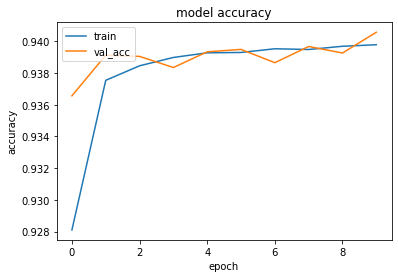

In [0]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper left')
plt.show()

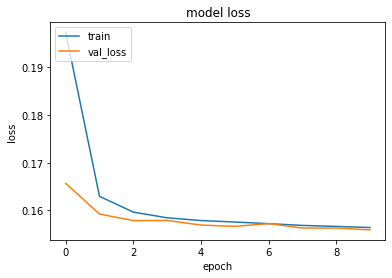

In [0]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

In [0]:
""" Making the predictions and evaluating the model"""
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
pd.DataFrame(data=[accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                   precision_score(y_test, y_pred), roc_auc_score(y_test, y_pred)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

,0
accuracy,0.939812
recall,0.989266
precision,0.948125
roc_auc_score,0.645932
